In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from scipy.signal import convolve2d
from ConvLayerPara import ConvLayerP
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
def testing_parallel(layer, N, C, M, H, W, K, t_naive, t_shared, t_sample_naive, t_sample_shared):
    print('N = ', N)
    x_shape = (N, C,H,W)
    m_shape = (M,C,K,K)
    X = np.random.rand(*x_shape).astype(np.float32)
    Masks = np.random.rand(*m_shape).astype(np.float32)

    t = time.time()
    _ = layer.forward_naive(X, Masks, N, C, M, H, W, K)
    t_naive.append(time.time()-t)
    print('Naive: ', t_naive[-1])

    t = time.time()
    _ = layer.forward_shared(X, Masks, N, C, M, H, W, K)
    t_shared.append(time.time()-t)
    print('Shared: ', t_shared[-1])

    t = time.time()
    for i in range(N):
        _ = layer.forward_sample_naive(X[i], Masks, C, M, H, W, K)
    t_sample_naive.append(time.time()-t)
    print('Sample_Naive: ', t_sample_naive[-1])

    t = time.time()
    for i in range(N):
        _ = layer.forward_sample_shared(X[i], Masks, C, M, H, W, K)
    t_sample_shared.append(time.time()-t)
    print('Sample_Shared: ', t_sample_naive[-1])

    return t_naive, t_shared, t_sample_naive, t_sample_shared

def testing_serial(layer, N, C, M, H, W, K, t_serial):
    print('N = ', N)
    t = time.time()
    _ = layer.forward_serial(X, Masks, N, C, M, H, W, K)
    t_serial.append(time.time()-t)
    print('Serial: ', t_serial[-1])

    return t_serial

def test_all(includeSerial = False):
    N_list = [1,2,4,8,16,32,64,128,256,512,1024,2048,4096]
    layer = ConvLayerP()
    C, M, H, W, K = 3, 16, 128, 128, 3
    t_naive = []
    t_shared = []
    t_sample_naive = []
    t_sample_shared = []
    t_serial = []
    for n in N_list:
        t_naive, t_shared, t_sample_naive, t_sample_shared = testing_parallel(layer, n, C, M, H, W, K, t_naive, t_shared, t_sample_naive, t_sample_shared)
    
    if includeSerial == True:
        for n in N_list[:4]:
            if n <= 4:
                t_serial = testing_serial(layer, n, C, M, H, W, K, t_serial)
    
    return t_naive, t_shared, t_sample_naive, t_sample_shared, t_serial

In [33]:
t_naive, t_shared, t_sample_naive, t_sample_shared, t_serial = test_all()

N =  1
Naive:  0.004659414291381836
Shared:  0.0022280216217041016
Sample_Naive:  0.0015020370483398438
Sample_Shared:  0.0015020370483398438
N =  2
Naive:  0.011365890502929688
Shared:  0.015963077545166016
Sample_Naive:  0.014511346817016602
Sample_Shared:  0.014511346817016602
N =  4
Naive:  0.011285781860351562
Shared:  0.02624344825744629
Sample_Naive:  0.013888835906982422
Sample_Shared:  0.013888835906982422
N =  8
Naive:  0.012840986251831055
Shared:  0.008711814880371094
Sample_Naive:  0.02904486656188965
Sample_Shared:  0.02904486656188965
N =  16
Naive:  0.009533882141113281
Shared:  0.01649785041809082
Sample_Naive:  0.049466848373413086
Sample_Shared:  0.049466848373413086
N =  64
Naive:  0.05377936363220215
Shared:  0.0650167465209961
Sample_Naive:  0.10147333145141602
Sample_Shared:  0.10147333145141602
N =  512
Naive:  0.5296812057495117
Shared:  0.7301716804504395
Sample_Naive:  1.4793424606323242
Sample_Shared:  1.4793424606323242
N =  1024
Naive:  0.6975929737091064


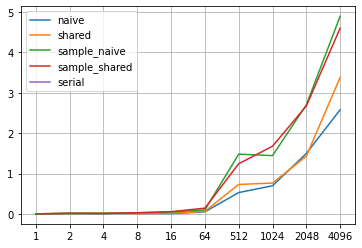

In [35]:
N_list = [1,2,4,8,16,64,512,1024,2048,4096]

plt.figure()
plt.plot(t_naive, label='naive')
plt.plot(t_shared, label='shared')
plt.plot(t_sample_naive, label='sample_naive')
plt.plot(t_sample_shared, label='sample_shared')
plt.plot(t_serial, label='serial')
plt.xticks(range(len(N_list)), N_list)
plt.grid()
plt.legend();

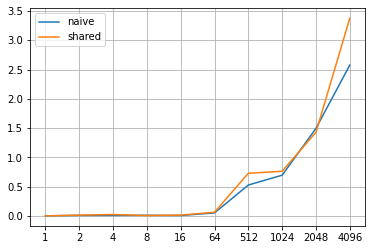

In [36]:
plt.figure()
plt.plot(t_naive, label='naive')
plt.plot(t_shared, label='shared')
plt.xticks(range(len(N_list)), N_list)
plt.grid()
plt.legend();

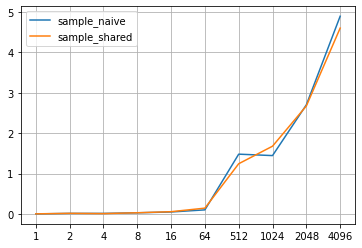

In [37]:
plt.figure()
plt.plot(t_sample_naive, label='sample_naive')
plt.plot(t_sample_shared, label='sample_shared')
plt.xticks(range(len(N_list)), N_list)
plt.grid()
plt.legend();

In [13]:
batch = 1000
C, M, H, W, K = 3, 3, 128, 128, 3

x_shape = (batch, C,H,W)
m_shape = (M,C,K,K)
y_shape = (batch, M, H-K+1, W-K+1)

X = np.random.rand(*x_shape).astype(np.float32)
print('Shape of X: ', X.shape)
Masks = np.random.rand(*m_shape).astype(np.float32)
print('Shape of Masks: ', Masks.shape)

Shape of X:  (1000, 3, 128, 128)
Shape of Masks:  (3, 3, 3, 3)


In [18]:
layer = ConvLayerP()
for i in range(batch):
    Y_sample_sahred = layer.forward_sample_shared(X[i], Masks, C, M, H, W, K)

In [5]:
layer = ConvLayerP()

Y_naive = layer.forward_naive(X, Masks, batch, C, M, H, W, K)
print(Y_naive.shape)
# print(Y_naive)

(32, 32, 1)
(2, 3, 4)
(2, 3, 63, 63)


In [5]:
layer = ConvLayerP()

Y_shared = layer.forward_shared(X, Masks, batch, C, M, H, W, K)
print(Y_shared.shape)
print(Y_shared)



Block:  (32, 32, 1)
Grid:  (1000, 3, 16)
sharedmem:  4660 Byte
(1000, 3, 126, 126)
[[[[7.549174   6.7277594  5.8029695  ... 6.741596   5.9617243
    6.192018  ]
   [4.845324   2.9781     6.973196   ... 6.0805006  5.011341
    5.971016  ]
   [4.9553337  2.7108836  5.9631977  ... 5.4173903  5.0405893
    6.173236  ]
   ...
   [4.887554   1.7476386  6.7087626  ... 6.581533   5.8476834
    5.214723  ]
   [4.4104886  1.7199509  7.196432   ... 5.244977   6.2033973
    6.212957  ]
   [4.769962   1.9473916  7.5131364  ... 5.637623   6.1410747
    6.205826  ]]

  [[5.5872993  2.1310399  5.1400485  ... 4.1776466  5.2308083
    4.809724  ]
   [3.5964904  1.2265097  1.4145409  ... 1.6886785  1.3710936
    1.6059567 ]
   [1.1568091  0.2721266  7.6042128  ... 6.7183166  6.8893013
    7.58477   ]
   ...
   [5.6464863  2.360147   8.796903   ... 7.3505726  6.627256
    6.999948  ]
   [5.497767   1.9313958  9.006899   ... 6.9564347  7.3519163
    7.5038877 ]
   [5.0266685  2.1553342  7.9220033  ... 6.37

In [10]:
layer = ConvLayerP()
batch = 1000

for i in range(batch):
    _ = layer.forward_sample_naive(X[i], Masks, C, M, H, W, K)
# Y_sample_naive = layer.forward_sample_naive(X[0], Masks, C, M, H, W, K)
# print('Shape of X: ', X[0].shape)
# print('Shape of Y', Y_sample_naive.shape)
# print(Y_sample_naive)


In [9]:
layer = ConvLayerP()

batch = 16

print(X.shape)
print(Masks.shape)

Y_serial = layer.forward_serial(X, Masks, batch, C, M, H, W, K)

(1000, 3, 128, 128)
(3, 3, 3, 3)


4